# Analyze networks of correlated objects

In [1]:
import scanpy as sc
import pandas as pd
import decoupler as dc
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
pd.options.mode.chained_assignment = None 
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "L4_IT")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [3]:
direct_table = pd.read_csv("scplus_outputs/eRegulon_direct.tsv", sep="\t", header=0)
extend_table = pd.read_csv("scplus_outputs/eRegulons_extended.tsv", sep="\t", header=0)

In [4]:
regulons_table = pd.concat([direct_table, extend_table], axis=0)
regulons_table.reset_index(drop=True, inplace=True)

## Overview from corr genes

In [5]:
positive_corr_genes = pd.read_csv(
    "rostral_caudal_spearman_expr_filtered/positive_corr_7e-1_bh_1e-2_donor.tsv",
    header=None,
    sep="\t"
)
positive_corr_genes.columns = ["Gene"]

In [6]:
positive_corr_genes_edges = pd.merge(
    left=regulons_table,
    right=positive_corr_genes,
    left_on="Gene",
    right_on="Gene",
    how="inner"
)

In [7]:
positive_corr_genes_edges.to_csv(
    "rostral_caudal_spearman_expr_filtered/positive_corr_7e-1_bh_1e-2_donor_network.tsv",
    header=True, index=False, sep="\t"
)

In [8]:
negative_corr_genes = pd.read_csv(
    "rostral_caudal_spearman_expr_filtered/negative_corr_7e-1_bh_1e-2_donor.tsv",
    header=None,
    sep="\t"
)
negative_corr_genes.columns = ["Gene"]

In [9]:
negative_corr_genes_edges = pd.merge(
    left=regulons_table,
    right=negative_corr_genes,
    left_on="Gene",
    right_on="Gene",
    how="inner"
)

In [10]:
negative_corr_genes_edges.to_csv(
    "rostral_caudal_spearman_expr_filtered/negative_corr_7e-1_bh_1e-2_donor_network.tsv",
    header=True, index=False, sep="\t"
)

## Predicted enhancers for corr genes

In [11]:
from scipy.cluster.hierarchy import linkage, leaves_list

In [12]:
atac_counts = sc.read_h5ad("L4_IT_atac_matrix.h5ad")
atac_counts.obs["Donor_Region"] = \
    atac_counts.obs["PatientID"].astype("str") + "_" + atac_counts.obs["Region"].astype("str")
atac_aggr_donor_region_counts = dc.get_pseudobulk(
    adata=atac_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(atac_aggr_donor_region_counts, target_sum=1e6)
sc.pp.log1p(atac_aggr_donor_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
atac_aggr_donor_region_counts.obs["Region"] = pd.Categorical(
    atac_aggr_donor_region_counts.obs["Region"], categories=region_align
)
sorted_index = atac_aggr_donor_region_counts.obs.sort_values(by="Region").index

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
atac_counts = sc.read_h5ad("L4_IT_atac_matrix.h5ad")
atac_aggr_region_counts = dc.get_pseudobulk(
    adata=atac_counts,
    sample_col="Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(atac_aggr_region_counts, target_sum=1e6)
sc.pp.log1p(atac_aggr_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
rna_counts = sc.read_h5ad("L4_IT_rna_matrix.h5ad")
rna_counts = rna_counts.raw.to_adata()
rna_counts.obs["Donor_Region"] = \
    rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
rna_aggr_donor_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(rna_aggr_donor_region_counts, target_sum=1e6)
sc.pp.log1p(rna_aggr_donor_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
rna_aggr_donor_region_counts.obs["Region"] = pd.Categorical(
    rna_aggr_donor_region_counts.obs["Region"], categories=region_align
)
sorted_index = rna_aggr_donor_region_counts.obs.sort_values(by="Region").index

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
rna_counts = sc.read_h5ad("L4_IT_rna_matrix.h5ad")
rna_counts = rna_counts.raw.to_adata()
rna_aggr_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(rna_aggr_region_counts, target_sum=1e6)
sc.pp.log1p(rna_aggr_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
corr_region_df = pd.read_csv(
    "L4_IT_atac_RC_spearman_corr_with_donor_replicates_expr_filtered.tsv",
    header=0, index_col=None, sep="\t"
)

### 1. Positively RC correlated genes

In [17]:
RC_pos_genes_network = pd.read_csv(
    "rostral_caudal_spearman_expr_filtered/positive_corr_7e-1_bh_1e-2_donor_network.tsv",
    header=0, index_col=None, sep="\t"
)
RC_pos_genes_network["Region"] = RC_pos_genes_network["Region"].apply(lambda x: "-".join(x.split(":")))

#### 1.1. +/+ type

In [18]:
curr_type = "\+/\+"
curr_edges = RC_pos_genes_network[RC_pos_genes_network["eRegulon_name"].str.contains(curr_type)]

In [19]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/expr_filtered/")

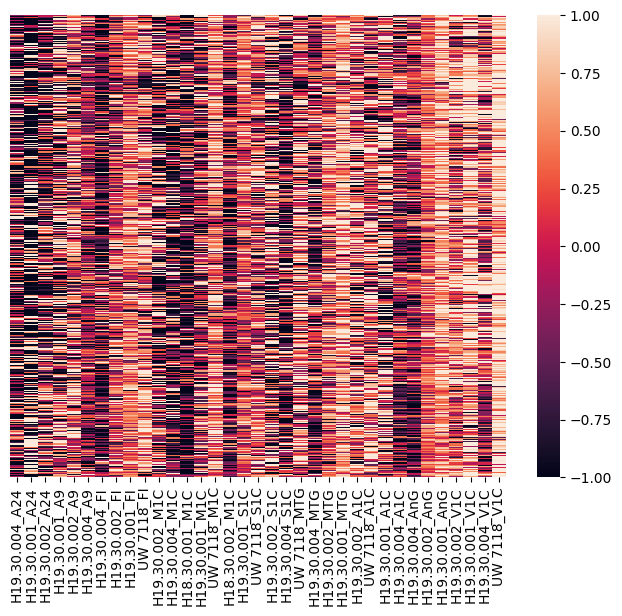

In [20]:
## Plot
plot_matrix = atac_aggr_donor_region_counts[sorted_index, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z,
    vmin=-1,
    vmax=1,
    xticklabels=sorted_index,
    yticklabels=[],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_pos_genes_activator_ccre_donor_heatmap.png", format="png", dpi=300)

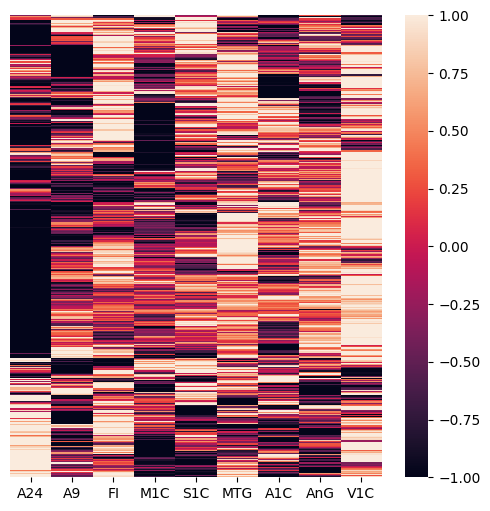

In [21]:
# Plot
plot_matrix = atac_aggr_region_counts[region_align, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
row_order = leaves_list(linkage_matrix)
plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-1,
    vmax=1,
    xticklabels=region_align,
    yticklabels=[],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_pos_genes_activator_ccre_region_heatmap.png", format="png", dpi=300)

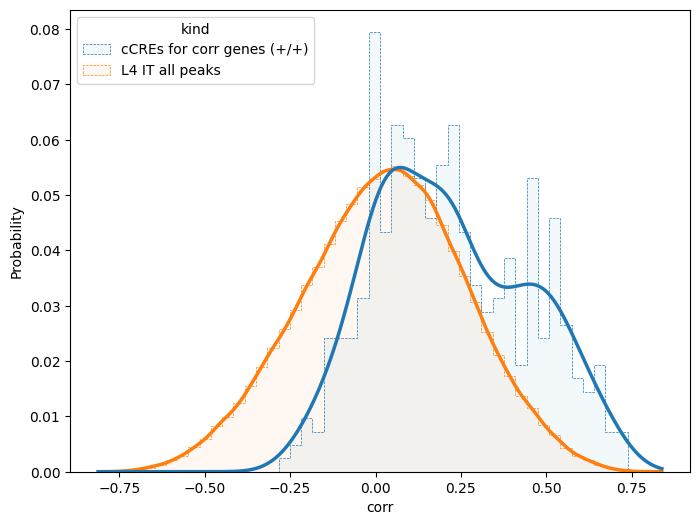

In [22]:
corr_region_df_pos = corr_region_df[
    corr_region_df["region"].isin(curr_edges["Region"])]
corr_region_df["kind"] = "L4 IT all peaks"
corr_region_df_pos["kind"] = "cCREs for corr genes (+/+)"
plot_df = pd.concat([corr_region_df_pos, corr_region_df], axis=0)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.histplot(
    plot_df, 
    x="corr", 
    hue="kind", 
    stat="probability", 
    fill=True,
    alpha=0.05,
    element="step",
    common_norm=False,
    linewidth=0.5,
    linestyle="dashed",
    bins=50,
    kde=True,
    line_kws={"linewidth": 2.5},
    cbar_kws={"loc": "right"}
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
fig.savefig(plot_dir / "L4_IT_pos_genes_activator_ccre_corr_distribution.png", format="png", dpi=300)

<AxesSubplot: >

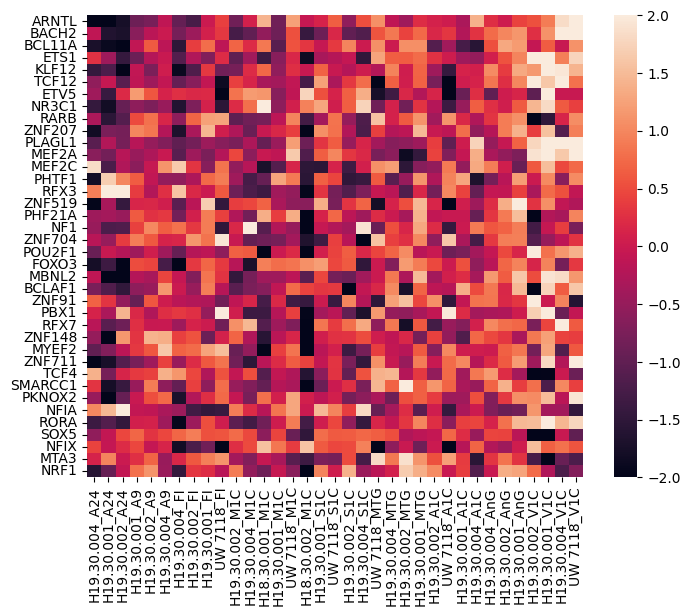

In [23]:
## Plot
plot_matrix = rna_aggr_donor_region_counts[sorted_index, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z,
    vmin=-2,
    vmax=2,
    xticklabels=sorted_index,
    yticklabels=curr_edges["TF"].unique(),
    ax=ax
)

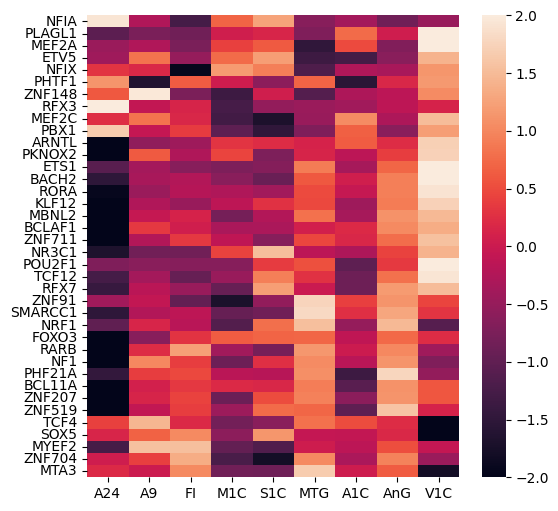

In [24]:
# Plot
plot_matrix = rna_aggr_region_counts[region_align, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
plot_matrix_z_clustered = plot_matrix_z
row_order = np.arange(plot_matrix_z.shape[0])
if (plot_matrix_z.shape[0] > 1):
    linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
    row_order = leaves_list(linkage_matrix)
    plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-2,
    vmax=2,
    xticklabels=region_align,
    yticklabels=curr_edges["TF"].unique()[row_order],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_pos_genes_activator_tf_region_heatmap.png", format="png", dpi=300)

### 2. Negatively RC correlated genes

In [25]:
RC_neg_genes_network = pd.read_csv(
    "L4_IT_negative_genes_bh_7e-1_5e-2_donor_replicate_network.tsv",
    header=0, index_col=None, sep="\t"
)
RC_neg_genes_network["Region"] = RC_neg_genes_network["Region"].apply(lambda x: "-".join(x.split(":")))

#### 2.1. +/+ type

In [26]:
curr_type = "\+/\+"
curr_edges = RC_neg_genes_network[RC_neg_genes_network["eRegulon_name"].str.contains(curr_type)]

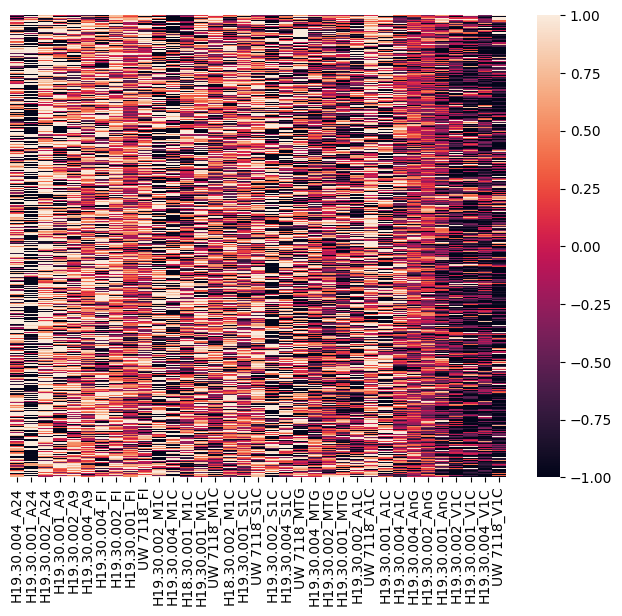

In [27]:
## Plot
plot_matrix = atac_aggr_donor_region_counts[sorted_index, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z,
    vmin=-1,
    vmax=1,
    xticklabels=sorted_index,
    yticklabels=[],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_neg_genes_activator_ccre_donor_heatmap.png", format="png", dpi=300)

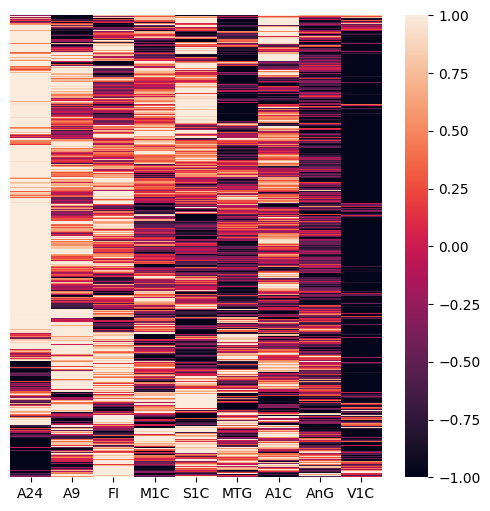

In [28]:
# Plot
plot_matrix = atac_aggr_region_counts[region_align, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
row_order = leaves_list(linkage_matrix)
plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-1,
    vmax=1,
    xticklabels=region_align,
    yticklabels=[],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_neg_genes_activator_ccre_region_heatmap.png", format="png", dpi=300)

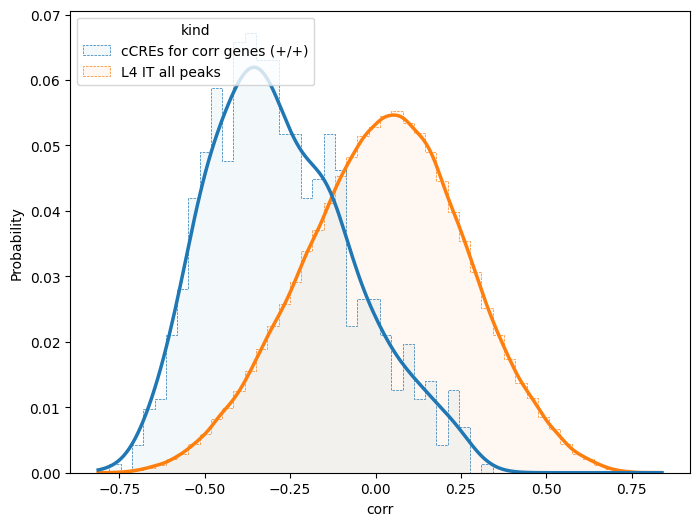

In [29]:
corr_region_df_neg = corr_region_df[
    corr_region_df["region"].isin(curr_edges["Region"])]
corr_region_df["kind"] = "L4 IT all peaks"
corr_region_df_neg["kind"] = "cCREs for corr genes (+/+)"
plot_df = pd.concat([corr_region_df_neg, corr_region_df], axis=0)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.histplot(
    plot_df, 
    x="corr", 
    hue="kind", 
    stat="probability", 
    fill=True,
    alpha=0.05,
    element="step",
    common_norm=False,
    linewidth=0.5,
    linestyle="dashed",
    bins=50,
    kde=True,
    line_kws={"linewidth": 2.5},
    cbar_kws={"loc": "right"}
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
fig.savefig(plot_dir / "L4_IT_neg_genes_activator_ccre_corr_distribution.png", format="png", dpi=300)

<AxesSubplot: >

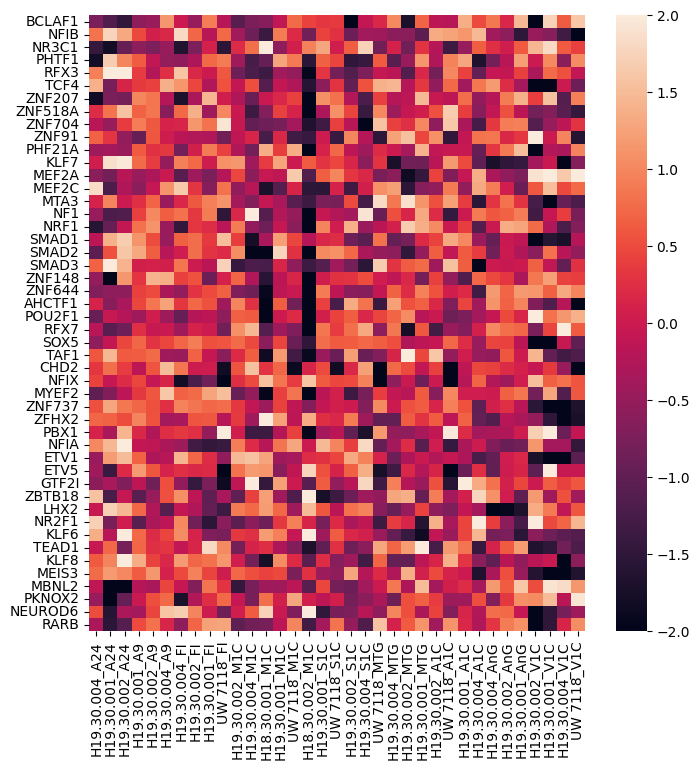

In [30]:
## Plot
plot_matrix = rna_aggr_donor_region_counts[sorted_index, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(
    plot_matrix_z,
    vmin=-2,
    vmax=2,
    xticklabels=sorted_index,
    yticklabels=curr_edges["TF"].unique(),
    ax=ax
)

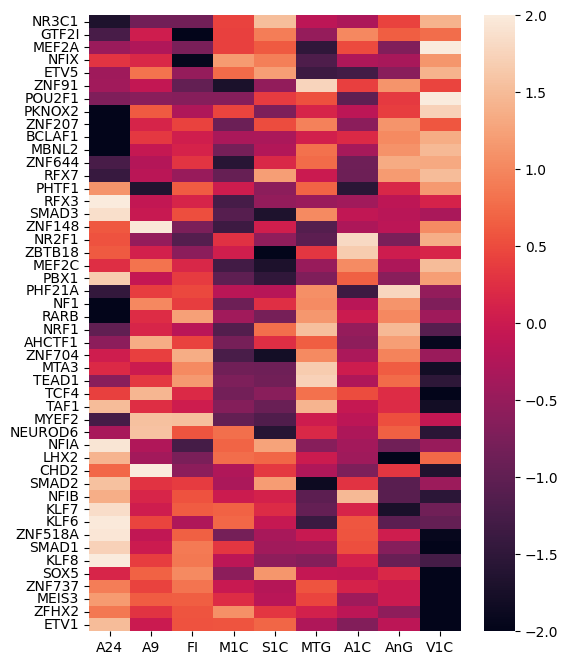

In [31]:
# Plot
plot_matrix = rna_aggr_region_counts[region_align, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
plot_matrix_z_clustered = plot_matrix_z
row_order = np.arange(plot_matrix_z.shape[0])
if (plot_matrix_z.shape[0] > 1):
    linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
    row_order = leaves_list(linkage_matrix)
    plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(8)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-2,
    vmax=2,
    xticklabels=region_align,
    yticklabels=curr_edges["TF"].unique()[row_order],
    ax=ax
)
fig.savefig(plot_dir / "L4_IT_neg_genes_activator_tf_region_heatmap.png", format="png", dpi=300)

#### 2.2. -/+ type

In [32]:
curr_type = "-/\+"
curr_edges = RC_neg_genes_network[RC_neg_genes_network["eRegulon_name"].str.contains(curr_type)]

<AxesSubplot: >

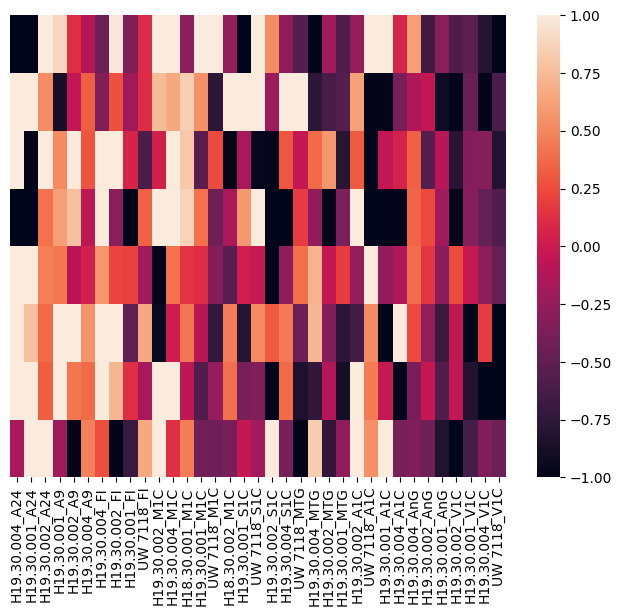

In [33]:
## Plot
plot_matrix = atac_aggr_donor_region_counts[sorted_index, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z,
    vmin=-1,
    vmax=1,
    xticklabels=sorted_index,
    yticklabels=[],
    ax=ax
)

<AxesSubplot: >

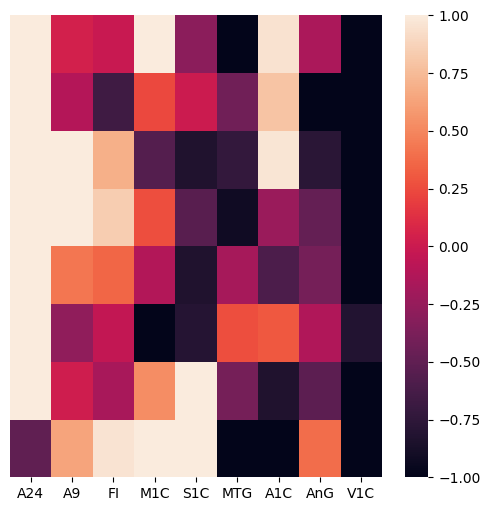

In [34]:
# Plot
plot_matrix = atac_aggr_region_counts[region_align, curr_edges["Region"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
row_order = leaves_list(linkage_matrix)
plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-1,
    vmax=1,
    xticklabels=region_align,
    yticklabels=[],
    ax=ax
)

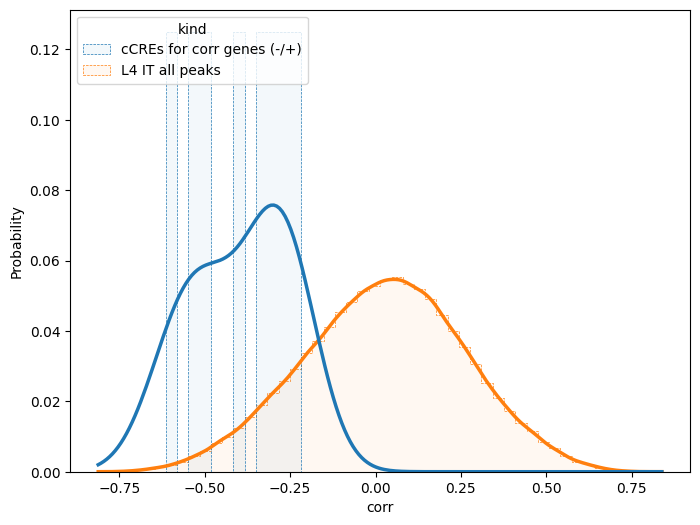

In [35]:
corr_region_df_neg = corr_region_df[
    corr_region_df["region"].isin(curr_edges["Region"])]
corr_region_df["kind"] = "L4 IT all peaks"
corr_region_df_neg["kind"] = "cCREs for corr genes (-/+)"
plot_df = pd.concat([corr_region_df_neg, corr_region_df], axis=0)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.histplot(
    plot_df, 
    x="corr", 
    hue="kind", 
    stat="probability", 
    fill=True,
    alpha=0.05,
    element="step",
    common_norm=False,
    linewidth=0.5,
    linestyle="dashed",
    bins=50,
    kde=True,
    line_kws={"linewidth": 2.5},
    cbar_kws={"loc": "right"}
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))

<AxesSubplot: >

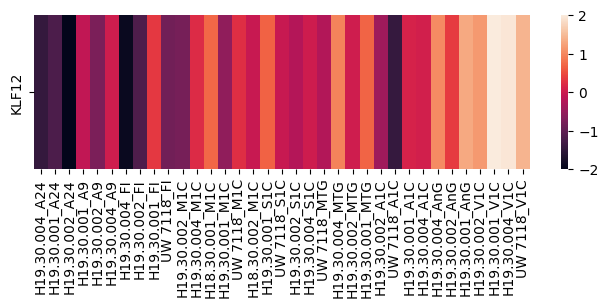

In [36]:
## Plot
plot_matrix = rna_aggr_donor_region_counts[sorted_index, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(2)
sns.heatmap(
    plot_matrix_z,
    vmin=-2,
    vmax=2,
    xticklabels=sorted_index,
    yticklabels=curr_edges["TF"].unique(),
    ax=ax
)

<AxesSubplot: >

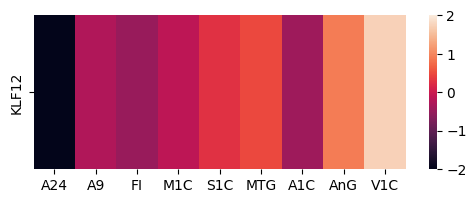

In [37]:
# Plot
plot_matrix = rna_aggr_region_counts[region_align, curr_edges["TF"].unique()].X.T
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds
plot_matrix_z_clustered = plot_matrix_z
row_order = np.arange(plot_matrix_z.shape[0])
if (plot_matrix_z.shape[0] > 1):
    linkage_matrix = linkage(plot_matrix_z, method="average", metric="euclidean")
    row_order = leaves_list(linkage_matrix)
    plot_matrix_z_clustered = plot_matrix_z[row_order, :]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(6)
fig.set_figheight(2)
sns.heatmap(
    plot_matrix_z_clustered,
    vmin=-2,
    vmax=2,
    xticklabels=region_align,
    yticklabels=curr_edges["TF"].unique()[row_order],
    ax=ax
)